## Project - COVID 19 Trend Analysis

Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of
infection and recovery as well as make predictions about the number of cases expected a week in future
based on the current trends

Guidelines:
* Use pandas to accumulate data from multiple data files
* Use plotly (visualization library) to create interactive visualizations
* Use Facebooks prophet library to make time series models
* Visualize the prediction by combining these technologies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [59]:
data=pd.read_csv('/content/covid_19_clean_complete.csv')

In [60]:
data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [61]:
data.rename(columns={'Date':'date', 'Province/State':'state',
                     'Country/Region':'country',
                     'Confirmed':'confirmed',	'Deaths':'deaths',
                     'Recovered':'recovered',
                    'Active':'active'}, inplace=True)

In [62]:
data.tail()

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [63]:
# Cases on the last day
top=data[data['date']==data['date'].max()]

In [64]:
top

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [65]:
w=top.groupby('country')['confirmed','recovered','active','deaths'].sum().reset_index()

<ipython-input-65-ad85dcf3804b>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [66]:
w

,country,confirmed,recovered,active,deaths
0,Afghanistan,36263,25198,9796,1269
1,Albania,4880,2745,1991,144
2,Algeria,27973,18837,7973,1163
3,Andorra,907,803,52,52
4,Angola,950,242,667,41
...,...,...,...,...,...
182,West Bank and Gaza,10621,3752,6791,78
183,Western Sahara,10,8,1,1
184,Yemen,1691,833,375,483
185,Zambia,4552,2815,1597,140


In [67]:
w.columns

Index(['country', 'confirmed', 'recovered', 'active', 'deaths'], dtype='object')

In [68]:
fig=px.choropleth(w,locations='country',locationmode='country names',
                  color='deaths', hover_name='country',
                  range_color=[1,50000],color_continuous_scale='Peach',
                  title="Deaths cases country wise")

fig.show()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [70]:
data['date']=pd.to_datetime(data['date'])

data['date']=data['date'].dt.date

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [72]:
data['date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
49063    2020-07-27
49064    2020-07-27
49065    2020-07-27
49066    2020-07-27
49067    2020-07-27
Name: date, Length: 49068, dtype: object

In [73]:
fig=px.choropleth(data,locations='country',locationmode='country names',
                  color='active', hover_name='country',
                  range_color=[1,5000],
                  animation_frame='date',color_continuous_scale='Peach',
                  title="Deaths cases country wise")

fig.show()

In [74]:
## Bar plot

t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [90]:
t_20_top=top.groupby('country')['active'].sum().reset_index().sort_values(by='active',ascending=False).head(20)

In [89]:
t_20_top.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(0, 1, 'Brazil'),
  Text(0, 2, 'India'),
  Text(0, 3, 'United Kingdom'),
  Text(0, 4, 'Russia'),
  Text(0, 5, 'South Africa'),
  Text(0, 6, 'Colombia'),
  Text(0, 7, 'France'),
  Text(0, 8, 'Canada'),
  Text(0, 9, 'Peru'),
  Text(0, 10, 'Bangladesh'),
  Text(0, 11, 'Spain'),
  Text(0, 12, 'Argentina'),
  Text(0, 13, 'Sweden'),
  Text(0, 14, 'Philippines'),
  Text(0, 15, 'Egypt'),
  Text(0, 16, 'Mexico'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Bolivia'),
  Text(0, 19, 'Saudi Arabia')])

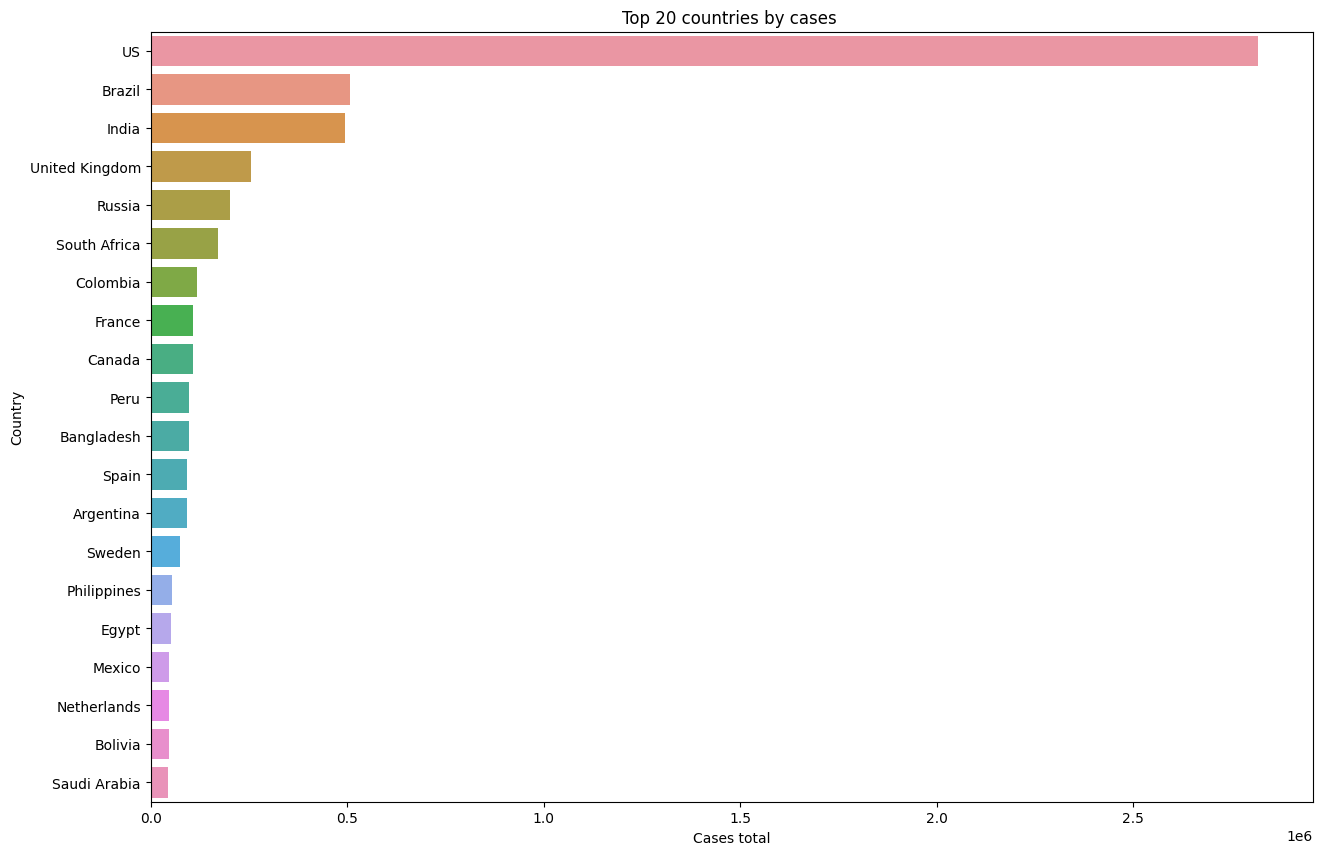

In [91]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries by cases ')

b=sns.barplot(x=t_20_top.active,y=t_20_top.country)

b.set(xlabel="Cases total",ylabel='Country')

plt.xticks()
plt.yticks()


## FB prophet

In [96]:
confirmed=data.groupby('date').sum()['confirmed'].reset_index()
recovered=data.groupby('date').sum()['recovered'].reset_index()
deaths=data.groupby('date').sum()['deaths'].reset_index()

<ipython-input-96-61488353bf1d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-96-61488353bf1d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-96-61488353bf1d>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [99]:
confirmed.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [98]:
from prophet import Prophet

In [107]:
confirmed.columns=['ds','y']
confirmed.tail(10)
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [108]:
model=Prophet(interval_width=0.95)

In [109]:
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdmh9smr/rqb1na6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdmh9smr/m3vkebfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59487', 'data', 'file=/tmp/tmpvdmh9smr/rqb1na6o.json', 'init=/tmp/tmpvdmh9smr/m3vkebfl.json', 'output', 'file=/tmp/tmpvdmh9smr/prophet_modelate3w5w7/prophet_model-20231115031739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [112]:
future=model.make_future_dataframe(periods=7,freq='D')
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [130]:
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.617128e+07,1.649290e+07
189,2020-07-29,1.652997e+07,1.636001e+07,1.669068e+07
190,2020-07-30,1.674391e+07,1.658250e+07,1.690380e+07
191,2020-07-31,1.695910e+07,1.679819e+07,1.711268e+07
192,2020-08-01,1.716676e+07,1.699103e+07,1.733554e+07
193,2020-08-02,1.736430e+07,1.719518e+07,1.753649e+07
194,2020-08-03,1.755889e+07,1.735542e+07,1.774032e+07


In [131]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    float64       
 3   yhat_upper                  195 non-null    float64       
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

In [132]:
forecast[['yhat','yhat_lower','yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

In [134]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
185,2020-07-25,15738824,15570561,15898289
186,2020-07-26,15936363,15760519,16099886
187,2020-07-27,16130952,15971175,16294535
188,2020-07-28,16320199,16171276,16492899
189,2020-07-29,16529972,16360010,16690680
190,2020-07-30,16743908,16582500,16903796
191,2020-07-31,16959097,16798193,17112678
192,2020-08-01,17166757,16991034,17335538
193,2020-08-02,17364296,17195178,17536490
194,2020-08-03,17558885,17355424,17740324


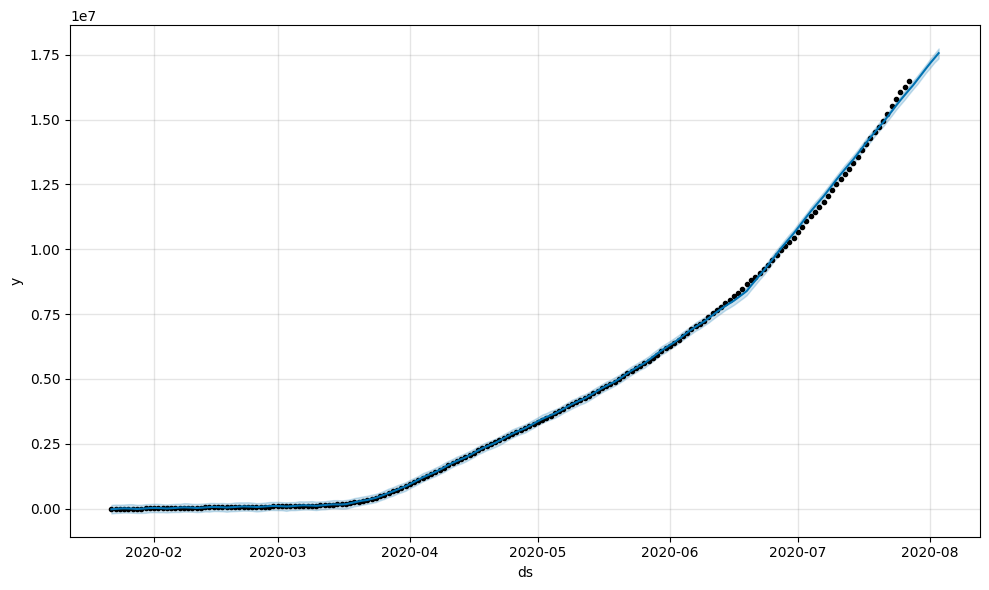

In [135]:
confirmed_forecast_plot=model.plot(forecast)

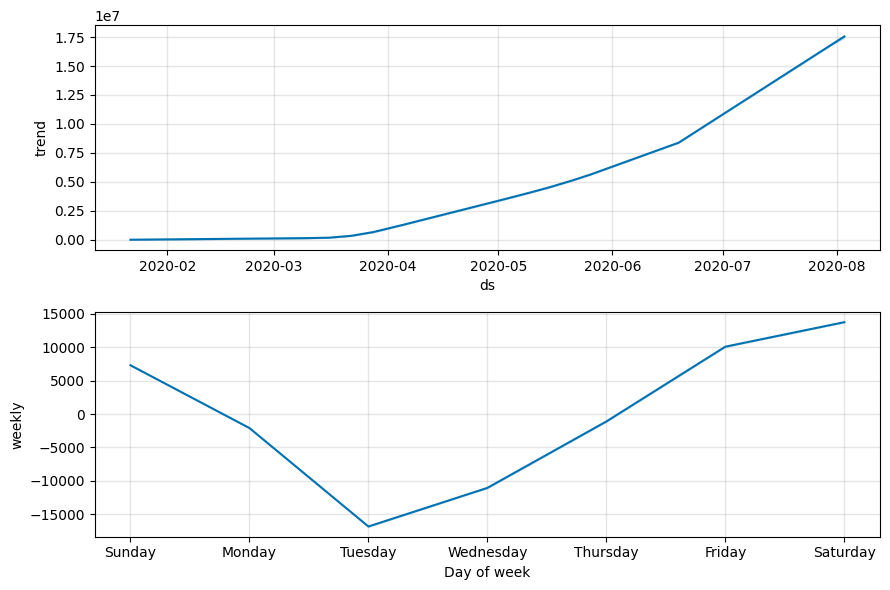

In [136]:
confirmed_forecast_plot=model.plot_components(forecast)